In [1]:
# 导入numpy库
import numpy as np

In [5]:
# numpy基本数据类型：ndarray数据
# ndarray 好处如下：
# 1. 批量处理数组元素速度快
# 2. 广播机制，适合矩阵运算
# 3. C语言编写底层，运行速度快

In [6]:
# np.array创建ndarray
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
c = a + b
c

array([6, 6, 6, 6, 6])

In [9]:
# zeros和ones创建全0 全1数组
a = np.zeros([2,2])
b = np.ones([2,2])
# 依次创建从0到20的数据，步长为4
c = np.arange(0,20,4)

In [19]:
# 创建随机数组
# 设置随机数种子,避免每次生成的结果不一样
np.random.seed(10)
# 均匀分布
np.random.rand(2,2)  # 创建2*2的数组 范围(0，1)
np.random.uniform(0,20)   # 创建(0,20)范围内的一个数
np.random.randint(0,20)   # 创建(0,20)范围内的一个整数
# 正态分布
np.random.normal(1.75, 0.1, (2,3))  # 给定均值，标准差，数组维度
np.random.randn(2,2)  # 创建一个2*2的标准正态分布（均值为0，标准差为1）

array([[-0.13623575,  0.17637307],
       [ 0.31085074,  1.72937588]])

In [27]:
# 随机数相关操作
a = np.arange(0,10,1)
np.random.shuffle(a)  # 打乱数据
b = np.random.rand(5,2) 
np.random.shuffle(b)  # 二维数据只打乱行，不打乱列

array([[0.7738303 , 0.03995921],
       [0.63649114, 0.34634715],
       [0.42949218, 0.31492687],
       [0.30545992, 0.33071931],
       [0.35718176, 0.07961309]])

In [34]:
# ndarray属性
b = np.random.rand(5,5)
b.shape  # 形状
b.size  # 大小
b.ndim  # 维度
b.dtype # 类型

dtype('float64')

In [85]:
# 基本的索引和切片
# 数据切片是原始数据的视图，意味着数据不会被赋值，视图上任何修改都会直接反应到源数组上
# 将一个标量值赋值给一个切片时，该值会自动传播到整个选区
a = np.arange(10)
a[5:8] = 0 
a
arr = a[5:8]
arr[1] = 99
arr[:] = 999
a
# 通过copy给新数组创建不同的内存空间,这样就不会改变原数组的值
x = np.copy(arr)
x[:] = [1,2,3]
x,a
#在二维数组中，各索引位置上的元素不再是标量而是一维数组
# 可以对各个元素进行递归访问，但是这样有点麻烦，所以另有一种方式是传入一个以逗号隔开的索引列表来选取单个元素
# 在多维数组中，如果省略了后面的索引，则返回对象是一个维度第一点的ndarray
np.random.seed(10)
b = np.random.rand(2,2,3)
b[0,0,0]  # 选取第一个元素

# 多维数组的索引和切片
c = np.arange(24)
c = c.reshape(-1, 4)  # reshape 形状为 6*4
# 将2维数组切分为3个数组
slices = [c[k:k+2] for k in range(0,6,2)]
slices

(array([1, 2, 3]), array([  0,   1,   2,   3,   4, 999, 999, 999,   8,   9]))

In [68]:
# 数组和标量之间的运算
# 数组很重要，因为它可以使我们不用编写循环即可对数据执行批量运算，这通常叫做矢量化
# 大小相等的数组之间的任何算术运算都会将运算应用到元素级
# 同样，数组与标量的算术运算也会将那个标量值传播到各个元素
a = np.arange(1,7).reshape(2,3)
1 / a
a - a
a * a 
a ** 3 # 表示a^2

array([[  1,   8,  27],
       [ 64, 125, 216]], dtype=int32)

In [90]:
# 数学和统计方法
# 可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算
# sum、mean以及标准差std等聚合计算即可以当做数组的实例方法调用，也可以当做Numpy函数使用
a = np.arange(1,10).reshape(-1,3)
a.mean()
a.sum()
a.max()
np.min(a)  # 和a.min()是等价的
# mean和sum这类的函数可以接受一个axis参数(用于计算该轴向上的统计量)，最终结果是一个少一维的数组
a.mean(axis=0)
a.sum(axis=0)
a.max(axis=1)
a.min(axis=1)
a.std() # 标准差
a.var() # 方差
a.argmin() # 最小值索引
a.argmax() # 最大值索引
a.cumsum() # 前面所有元素的累加  
a.cumprod() # 所有元素的累积
# 三维数组
b = np.arange(1,13).reshape(2,2,3)
print(b)
b.mean(axis=0)
b.max(axis=1)  # b[:,0,:] 与 b[:,1,:]比较

array([     1,      2,      6,     24,    120,    720,   5040,  40320,
       362880], dtype=int32)

In [108]:
# 线性代数
# numpy.linalg中有一组标准的矩阵分解运算以及例如求逆和行列式之类的东西
# 它们跟MATLAB和R等语言所使用的是相同的行业标准级Fortran库
# numpy提供了一个用于矩阵乘法的dot函数（即是一个数组方法，也是numpy命名空间的一个函数）
a = np.arange(1,7).reshape(2,3)
b = np.array([[6,23],[-1,7],[8,9]])
a.dot(b) # 相当于np.dot(a,b)

# np.linalg.diag 以一维数组的形式返回方阵的对角线（或非对角线）元素，
# 或将一维数组转换为方阵（非对角线元素为0）
c = np.arange(1,10).reshape(3,3)
d = np.diag(c)
e = np.diag(d)
e
# treace, 计算对角线元素的和
f = np.trace(e)
f
# det, 计算矩阵的行列式
g = np.linalg.det(e)
g
# eig，计算特征值和特征向量
h = np.linalg.eig(e)
h
# inv，计算方阵的逆
j = np.linalg.inv(e)
j
# pinv，计算矩阵的Mooer-Penrose伪逆
# qr，计算OR分解
# svd，计算奇异值分解（SVD）
# solve，解线性方程组Ax=b，其中A为一个方阵
# lstsq，计算Ax=b的最小二乘解

array([[1.        , 0.        , 0.        ],
       [0.        , 0.2       , 0.        ],
       [0.        , 0.        , 0.11111111]])

In [110]:
# Numpy还可以方便地进行文件读写
# 使用np.fromfile从文本文件中读入数据，seq为分割符号
# file = np.fromfile('XXXX',seq=' ')  # XXX 为文件pwd

a = np.random.randn(3,3)
# 将a写到.npy文件
np.save('a.npy',a)
# 从.npy文件中读入文件
b = np.load('a.npy')
# 检查 a和b 是否相等
check = (a==b).all()
check

True

Text(0, 0.5, 'y')

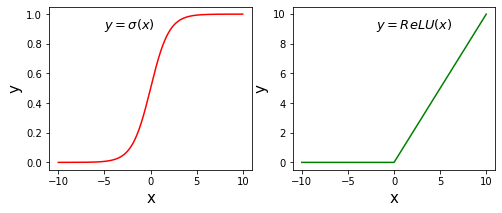

In [121]:
# Numpy应用举例
# 计算激活函数sigmiod 和 ReLU
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(8,3))  # 设置图片大小
x = np.arange(-10,10,0.01)
# sigmoid
s = 1.0/(1.0 + np.exp(-x))
# ReLU
y = np.clip(x, a_min=0., a_max=None)

# 画图程序
f = plt.subplot(121)  # 设置两个子图窗口，将sigmoid的函数图像画在左边
plt.plot(x, s, color='r')
plt.text(-5., 0.9, r'$y=\sigma(x)$', fontsize=13) # 添加文字说明
# 设置坐标轴格式
currentAxis = plt.gca()
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)
f = plt.subplot(122) # ReLU画在右边
f = plt.plot(x,y,color='g')
plt.text(-2.0, 9, r'$y=ReLU(x)$',fontsize=13) # 添加文字说明
currentAxis = plt.gca()
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)

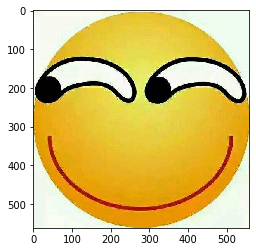

In [124]:
# numpy处理图像问题
from PIL import Image

# 读入图片
image = Image.open('img.jpg')
image = np.array(image)
plt.imshow(image)

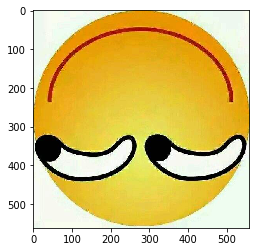

In [125]:
# 垂直方向旋转
# 这里使用数组切片的方式来完成 相当于将图片的最后一行挪到第一行，倒数第二行挪到第二行。。。
# 对于行指标，使用::-1来表示切片，负数步长表示以最后一个元素为起点，向左寻找下一个点
# 其余维度用：表示不改变
image2 = image[::-1, :, :]
plt.imshow(image2)

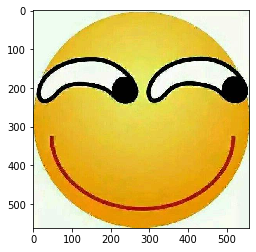

In [126]:
# 水平方向翻转
image3 = image[:,::-1,:]
plt.imshow(image3)

In [127]:
# 保存图片
img3 = Image.fromarray(image3)
img3.save('img3.jpg')

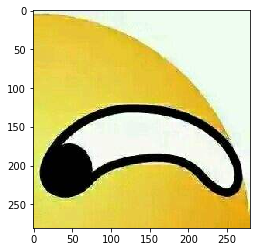

In [131]:
# 裁剪
h,w = image.shape[0],image.shape[1]
image4 = image[0:h//2,w//2:w,:]
plt.imshow(image4)

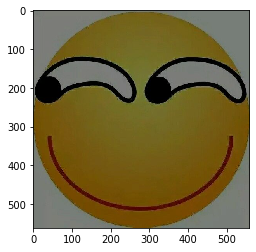

In [133]:
# 调整亮度
image5 = image * 0.5
plt.imshow(image5.astype('uint8'))

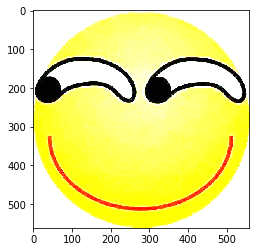

In [136]:
image6 = image * 2.0
# 由于RGB值必须在0-255之间 此处用np.clip进行数值
image6 = np.clip(image6, a_min=0., a_max=255.)
plt.imshow(image6.astype('uint8'))

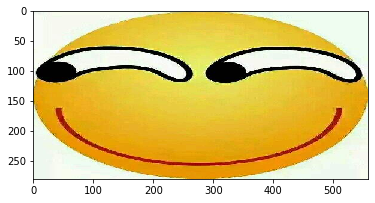

In [137]:
# 压缩
image7 = image[::2,:,:]
plt.imshow(image7)

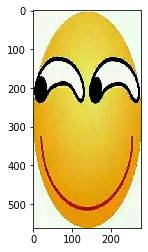

In [143]:
image8 = image[:,::2,:]
plt.imshow(image8)

Text(0, 0.5, 'x')

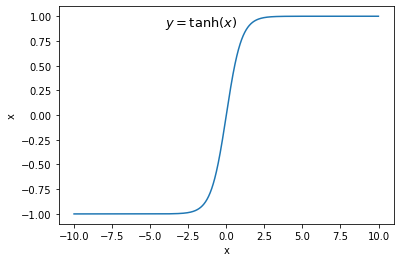

In [151]:
# 课后作业题1
# 使用numpy计算tanh激活函数
x = np.arange(-10,10,0.01)
t = (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))
plt.plot(x,t)
plt.text(-4., 0.9, r'$y=\tanh(x)$', fontsize=13)
Axis = plt.gca()
Axis.xaxis.set_label_text('x')
Axis.yaxis.set_label_text('x')

In [159]:
# 课后作业题2
# 统计随机生成矩阵中有多少个元素大于0
p = np.random.randn(10,10)
count = (p>0).sum()
count

40